In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv("ATM_cash_flow_data_80%.csv")  
df.head(10)

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Total amount Withdrawn
0,KK Nagar ATM,11/10/2013,249,190,59,918200,283000,FRIDAY,NH,W,WWH,1201200
1,KK Nagar ATM,11/16/2015,106,65,41,366700,229600,Monday,NH,W,HWW,596300
2,Airport ATM,7/31/2013,141,107,34,550500,72100,WEDNESDAY,NH,W,WWW,622600
3,Airport ATM,1/16/2011,42,33,9,132800,21300,Sunday,H,H,HHH,154100
4,Big Street ATM,10/3/2017,67,20,47,80300,127100,FRIDAY,NH,W,WWH,207400
5,Mount Road ATM,3/8/2011,207,90,117,340100,415100,Wednesday,NH,W,WWW,755200
6,KK Nagar ATM,2/26/2013,212,168,44,806300,116800,TUESDAY,NH,W,WWW,923100
7,KK Nagar ATM,9/6/2013,194,100,94,339400,372700,SUNDAY,NH,H,HHW,712100
8,Airport ATM,2/26/2013,57,44,13,257900,37100,TUESDAY,NH,W,WWW,295000
9,Big Street ATM,8/16/2012,52,20,32,92100,86800,WEDNESDAY,N,H,WHW,178900


In [3]:
df.isnull().sum()

ATM Name                        0
Transaction Date                0
No Of Withdrawals               0
No Of XYZ Card Withdrawals      0
No Of Other Card Withdrawals    0
Amount withdrawn XYZ Card       0
Amount withdrawn Other Card     0
Weekday                         0
Festival Religion               0
Working Day                     0
Holiday Sequence                0
Total amount Withdrawn          0
dtype: int64

In [4]:
# Convert 'Transaction Date' to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Total amount Withdrawn
0,KK Nagar ATM,2013-11-10,249,190,59,918200,283000,FRIDAY,NH,W,WWH,1201200
1,KK Nagar ATM,2015-11-16,106,65,41,366700,229600,Monday,NH,W,HWW,596300
2,Airport ATM,2013-07-31,141,107,34,550500,72100,WEDNESDAY,NH,W,WWW,622600
3,Airport ATM,2011-01-16,42,33,9,132800,21300,Sunday,H,H,HHH,154100
4,Big Street ATM,2017-10-03,67,20,47,80300,127100,FRIDAY,NH,W,WWH,207400


In [5]:
# Convert the 'Transaction Date' column to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format="%d-%m-%Y")

# Create new columns for Year, Month, Day, and Weekday
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Day'] =  df['Transaction Date'].dt.day
df['Weekday'] = df['Transaction Date'].dt.dayofweek

In [6]:
df.tail()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Total amount Withdrawn,Year,Month,Day
9266,Mount Road ATM,2017-06-19,42,12,30,53000,27700,0,NH,W,HWW,80700,2017,6,19
9267,Christ College ATM,2011-07-30,109,51,58,199800,225100,5,NH,H,HHW,424900,2011,7,30
9268,KK Nagar ATM,2011-10-14,171,134,37,545000,167700,4,NH,W,WWH,712700,2011,10,14
9269,Airport ATM,2012-05-03,103,82,21,482000,70300,3,NH,H,HHW,552300,2012,5,3
9270,Big Street ATM,2013-06-23,98,28,70,49600,130200,6,NH,H,HHW,179800,2013,6,23


In [7]:
# Create new columns for sin and cos waves for the month
df['Sin_Month'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Cos_Month'] = np.cos(2 * np.pi * df['Month'] / 12)

df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Total amount Withdrawn,Year,Month,Day,Sin_Month,Cos_Month
0,KK Nagar ATM,2013-11-10,249,190,59,918200,283000,6,NH,W,WWH,1201200,2013,11,10,-0.500000,0.866025
1,KK Nagar ATM,2015-11-16,106,65,41,366700,229600,0,NH,W,HWW,596300,2015,11,16,-0.500000,0.866025
2,Airport ATM,2013-07-31,141,107,34,550500,72100,2,NH,W,WWW,622600,2013,7,31,-0.500000,-0.866025
3,Airport ATM,2011-01-16,42,33,9,132800,21300,6,H,H,HHH,154100,2011,1,16,0.500000,0.866025
4,Big Street ATM,2017-10-03,67,20,47,80300,127100,1,NH,W,WWH,207400,2017,10,3,-0.866025,0.500000


In [8]:
# Assuming 'df' is your DataFrame
df.set_index('Transaction Date', inplace=True)


In [9]:
df.count()

ATM Name                        9271
No Of Withdrawals               9271
No Of XYZ Card Withdrawals      9271
No Of Other Card Withdrawals    9271
Amount withdrawn XYZ Card       9271
Amount withdrawn Other Card     9271
Weekday                         9271
Festival Religion               9271
Working Day                     9271
Holiday Sequence                9271
Total amount Withdrawn          9271
Year                            9271
Month                           9271
Day                             9271
Sin_Month                       9271
Cos_Month                       9271
dtype: int64

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Specify columns containing string values that need to be encoded
columns_to_encode = ['ATM Name','Working Day', 'Festival Religion','Holiday Sequence']

# Use LabelEncoder to encode string values to numeric
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


In [11]:
df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Total amount Withdrawn,Year,Month,Day,Sin_Month,Cos_Month
Transaction Date,,,,,,,,,,,,,,,,
2013-11-10,3,249,190,59,918200,283000,6,4,1,6,1201200,2013,11,10,-0.500000,0.866025
2015-11-16,3,106,65,41,366700,229600,0,4,1,3,596300,2015,11,16,-0.500000,0.866025
2013-07-31,0,141,107,34,550500,72100,2,4,1,7,622600,2013,7,31,-0.500000,-0.866025
2011-01-16,0,42,33,9,132800,21300,6,1,0,0,154100,2011,1,16,0.500000,0.866025
2017-10-03,1,67,20,47,80300,127100,1,4,1,6,207400,2017,10,3,-0.866025,0.500000


In [12]:
# Assuming 'df' is your DataFrame
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9271 entries, 2013-11-10 to 2013-06-23
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ATM Name                      9271 non-null   int32  
 1   No Of Withdrawals             9271 non-null   int64  
 2   No Of XYZ Card Withdrawals    9271 non-null   int64  
 3   No Of Other Card Withdrawals  9271 non-null   int64  
 4   Amount withdrawn XYZ Card     9271 non-null   int64  
 5   Amount withdrawn Other Card   9271 non-null   int64  
 6   Weekday                       9271 non-null   int32  
 7   Festival Religion             9271 non-null   int32  
 8   Working Day                   9271 non-null   int32  
 9   Holiday Sequence              9271 non-null   int32  
 10  Total amount Withdrawn        9271 non-null   int64  
 11  Year                          9271 non-null   int32  
 12  Month                         9271 non-null 

In [14]:
# Remove and return the column 'Total amount Withdrawn', and then reinsert it at the last position
df['Total amount Withdrawn'] = df.pop('Total amount Withdrawn')

In [15]:
df.describe()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn
count,9271.000000,9271.000000,9271.000000,9271.000000,9.271000e+03,9.271000e+03,9271.00000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000,9.271000e+03,9.271000e+03,9.271000e+03
mean,2.001942,122.835509,67.092762,55.742746,3.323853e+05,1.872054e+05,2.98285,3.819437,0.571136,3.843275,2013.769712,6.347751,15.726998,4.978235e-03,-3.373561e-02,5.195907e+05
std,1.399105,66.995387,47.375045,38.622932,2.454145e+05,1.501684e+05,2.00980,0.696713,0.494941,2.658346,1.922931,3.379149,8.874956,7.138271e-01,6.995683e-01,3.231406e+05
min,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000,-1.000000e+00,-1.000000e+00,1.000000e+02
25%,1.000000,79.000000,34.000000,25.000000,1.539000e+05,7.900000e+04,1.00000,4.000000,0.000000,1.000000,2012.000000,3.000000,8.000000,-8.660254e-01,-8.660254e-01,3.049000e+05
50%,2.000000,115.000000,57.000000,50.000000,2.793000e+05,1.581000e+05,3.00000,4.000000,1.000000,3.000000,2014.000000,6.000000,16.000000,1.224647e-16,-1.836970e-16,4.687000e+05
75%,3.000000,157.000000,86.000000,78.000000,4.473000e+05,2.549500e+05,5.00000,4.000000,1.000000,7.000000,2015.000000,9.000000,23.000000,8.660254e-01,5.000000e-01,6.681000e+05
max,4.000000,490.000000,345.000000,310.000000,1.907800e+06,1.472600e+06,6.00000,4.000000,1.000000,7.000000,2017.000000,12.000000,31.000000,1.000000e+00,1.000000e+00,2.459200e+06


In [16]:
X = df.drop('Total amount Withdrawn' , axis = 1) # Features are all columns except the last one
y = df["Total amount Withdrawn"]   # Target variable is the last column


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
X_train

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month
Transaction Date,,,,,,,,,,,,,,,
2011-12-06,1,29,14,15,62300,63200,1,4,0,1,2011,12,6,-2.449294e-16,1.000000e+00
2015-02-19,1,122,39,83,188900,203500,3,4,1,7,2015,2,19,8.660254e-01,5.000000e-01
2012-11-21,4,162,81,81,266100,156800,2,4,0,1,2012,11,21,-5.000000e-01,8.660254e-01
2013-03-07,2,182,80,102,454900,412100,3,4,1,7,2013,3,7,1.000000e+00,6.123234e-17
2011-06-19,0,89,64,25,245600,28300,6,4,0,1,2011,6,19,1.224647e-16,-1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-25,3,85,66,19,201200,71400,6,0,0,1,2011,12,25,-2.449294e-16,1.000000e+00
2014-02-20,0,99,78,21,394700,54500,3,4,1,7,2014,2,20,8.660254e-01,5.000000e-01
2013-04-19,2,162,69,93,281100,288600,4,4,1,6,2013,4,19,8.660254e-01,-5.000000e-01


In [19]:
    y_train

Transaction Date
2011-12-06    125500
2015-02-19    392400
2012-11-21    422900
2013-03-07    867000
2011-06-19    273900
               ...  
2011-12-25    272600
2014-02-20    449200
2013-04-19    569700
2016-08-17    231700
2013-04-16    443400
Name: Total amount Withdrawn, Length: 7416, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_scale= std.fit_transform(X_train)
X_test_scale= std.fit_transform(X_test)

In [21]:
# Convert them to numpy arrays
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_test_np = y_test.to_numpy().reshape(-1, 1)
y_train_scale= std.fit_transform(y_train_np)
y_test_scale= std.fit_transform(y_test_np)


In [22]:
y_train_scale

array([[-1.21773057],
       [-0.3936973 ],
       [-0.29953089],
       ...,
       [ 0.15370285],
       [-0.88984622],
       [-0.23623871]])

In [23]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# Instantiate and train the AdaBoost classifier
#base_estimator = DecisionTreeRegressor(max_depth=1000,ccp_alpha=0.0)
svr_regressor = SVR(kernel='linear')
adaboost = AdaBoostRegressor(base_estimator=svr_regressor, n_estimators=50, random_state=42)

In [24]:
adaboost.fit(X_train_scale, y_train_scale)
predictions = adaboost.predict(X_train_scale)
print(predictions)

C:\Users\gss\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gss\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[-1.23686237 -0.34797225 -0.28977156 ...  0.17478014 -0.8437941
 -0.22279466]


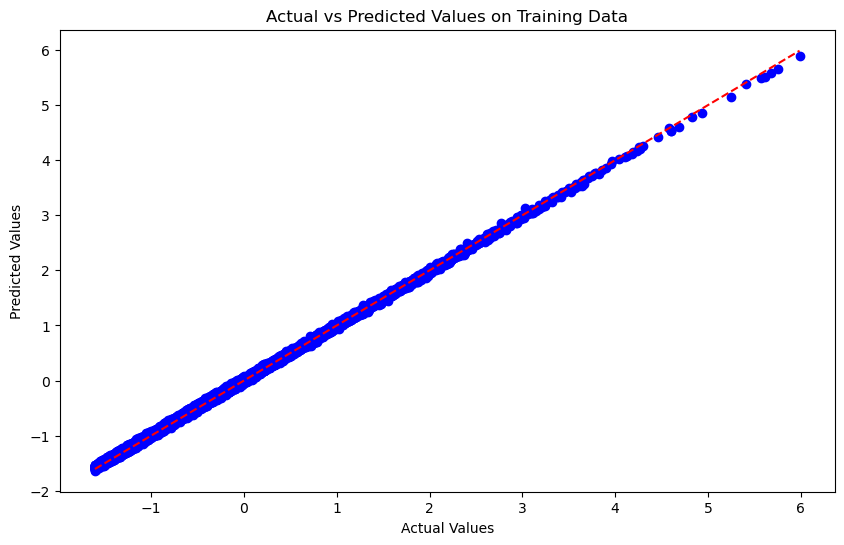

In [25]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_scale, predictions, color='blue')
plt.plot([min(y_train_scale), max(y_train_scale)], [min(y_train_scale), max(y_train_scale)], linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values on Training Data")
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Mean Squared Error (MSE)
mse = mean_squared_error(y_train_scale, predictions)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_train_scale, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train_scale, predictions)
print("Mean Absolute Error (MAE):", mae)

# Coefficient of Determination (R^2 Score)
r2 = r2_score(y_train_scale, predictions)
print("Coefficient of Determination (R^2 Score):", r2)


Mean Squared Error (MSE): 0.0009731441866623426
Root Mean Squared Error (RMSE): 0.03119525904143677
Mean Absolute Error (MAE): 0.024876971529927003
Coefficient of Determination (R^2 Score): 0.9990268558133376


In [27]:
#Assuming 'predictions' contains the scaled predictions
predictions=predictions.reshape(-1,1)
# Inverse transform scaled predictions back to original scale
y_pred_rescaled = std.inverse_transform(predictions)
# Print the rescaled predictions
print(y_pred_rescaled)

[[122471.65167348]
 [406931.3981218 ]
 [425556.59692129]
 ...
 [574220.93190467]
 [248260.08983033]
 [446990.3270288 ]]


In [28]:
# Concatenate the two DataFrames side by side
original_train_df = pd.concat([X_train, y_train], axis=1)
# Display the concatenated DataFrame
original_train_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn
Transaction Date,,,,,,,,,,,,,,,,
2011-12-06,1,29,14,15,62300,63200,1,4,0,1,2011,12,6,-2.449294e-16,1.000000e+00,125500
2015-02-19,1,122,39,83,188900,203500,3,4,1,7,2015,2,19,8.660254e-01,5.000000e-01,392400
2012-11-21,4,162,81,81,266100,156800,2,4,0,1,2012,11,21,-5.000000e-01,8.660254e-01,422900
2013-03-07,2,182,80,102,454900,412100,3,4,1,7,2013,3,7,1.000000e+00,6.123234e-17,867000
2011-06-19,0,89,64,25,245600,28300,6,4,0,1,2011,6,19,1.224647e-16,-1.000000e+00,273900


In [29]:
# Create a new column in the DataFrame for the predicted values
original_train_df['Predicted_Value'] =y_pred_rescaled

# Display the DataFrame with the predicted values added
original_train_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn,Predicted_Value
Transaction Date,,,,,,,,,,,,,,,,,
2011-12-06,1,29,14,15,62300,63200,1,4,0,1,2011,12,6,-2.449294e-16,1.000000e+00,125500,122471.651673
2015-02-19,1,122,39,83,188900,203500,3,4,1,7,2015,2,19,8.660254e-01,5.000000e-01,392400,406931.398122
2012-11-21,4,162,81,81,266100,156800,2,4,0,1,2012,11,21,-5.000000e-01,8.660254e-01,422900,425556.596921
2013-03-07,2,182,80,102,454900,412100,3,4,1,7,2013,3,7,1.000000e+00,6.123234e-17,867000,859087.338664
2011-06-19,0,89,64,25,245600,28300,6,4,0,1,2011,6,19,1.224647e-16,-1.000000e+00,273900,281402.423434


In [30]:
# Calculate individual error
original_train_df['Individual Error'] = original_train_df['Total amount Withdrawn']-original_train_df['Predicted_Value'] 

# Display the DataFrame with the individual error column added
original_train_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn,Predicted_Value,Individual Error
Transaction Date,,,,,,,,,,,,,,,,,,
2011-12-06,1,29,14,15,62300,63200,1,4,0,1,2011,12,6,-2.449294e-16,1.000000e+00,125500,122471.651673,3028.348327
2015-02-19,1,122,39,83,188900,203500,3,4,1,7,2015,2,19,8.660254e-01,5.000000e-01,392400,406931.398122,-14531.398122
2012-11-21,4,162,81,81,266100,156800,2,4,0,1,2012,11,21,-5.000000e-01,8.660254e-01,422900,425556.596921,-2656.596921
2013-03-07,2,182,80,102,454900,412100,3,4,1,7,2013,3,7,1.000000e+00,6.123234e-17,867000,859087.338664,7912.661336
2011-06-19,0,89,64,25,245600,28300,6,4,0,1,2011,6,19,1.224647e-16,-1.000000e+00,273900,281402.423434,-7502.423434


In [31]:
original_train_df.to_csv("Train80%_80%_adaboost.csv", index=False)

In [32]:
predictions = adaboost.predict(X_test_scale)
print(predictions)

[ 1.11743026 -0.46405551 -0.76054236 ...  1.40051073 -0.57373713
  0.58623184]


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_scale, predictions)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_scale, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_scale ,predictions)
print("Mean Absolute Error (MAE):", mae)

# Coefficient of Determination (R^2 Score)
r2 = r2_score(y_test_scale, predictions)
print("Coefficient of Determination (R^2 Score):", r2)


Mean Squared Error (MSE): 0.0019644970250014267
Root Mean Squared Error (RMSE): 0.04432264686366809
Mean Absolute Error (MAE): 0.03298949304387675
Coefficient of Determination (R^2 Score): 0.9980355029749985


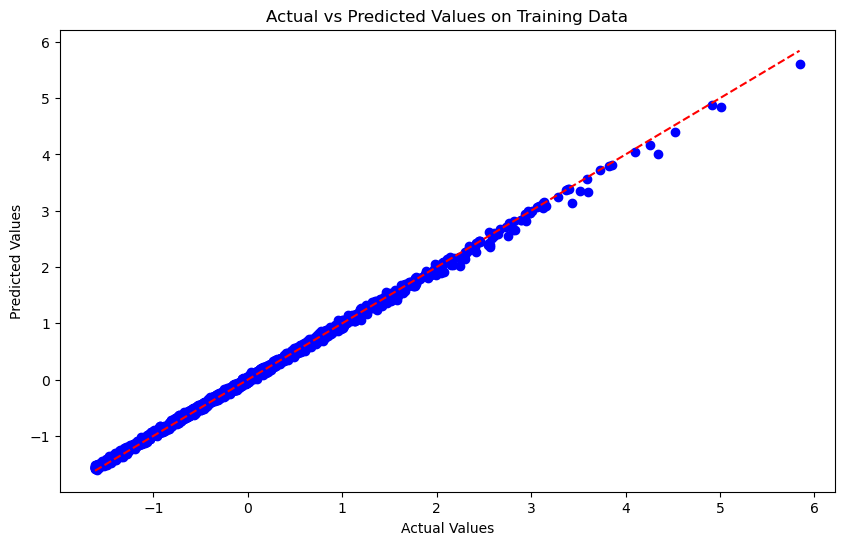

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scale, predictions, color='blue')
plt.plot([min(y_test_scale), max(y_test_scale)], [min(y_test_scale), max(y_test_scale)], linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values on Training Data")
plt.show()

In [35]:
predictions=predictions.reshape(-1,1)
y_test_rescaled = std.inverse_transform(predictions)
print(y_test_rescaled)

[[875884.78315479]
 [369782.80841152]
 [274902.0445659 ]
 ...
 [966475.28010764]
 [334682.84915053]
 [705892.37730777]]


In [36]:
# Concatenate the two DataFrames side by side
original_test_df = pd.concat([X_test, y_test], axis=1)
# Display the concatenated DataFrame
original_test_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn
Transaction Date,,,,,,,,,,,,,,,,
2016-04-16,3,147,109,38,737000,128000,5,4,0,1,2016,4,16,0.866025,-5.000000e-01,865000
2017-08-13,0,94,47,47,241900,102300,6,4,0,1,2017,8,13,-0.866025,-5.000000e-01,344200
2014-09-08,1,87,30,57,118100,147900,0,4,0,1,2014,9,8,-1.000000,-1.836970e-16,266000
2013-01-15,4,33,14,19,25200,75300,1,1,0,0,2013,1,15,0.500000,8.660254e-01,100500
2012-05-10,0,92,62,30,425900,140100,3,3,0,5,2012,5,10,0.500000,-8.660254e-01,566000


In [37]:
# Create a new column in the DataFrame for the predicted values
original_test_df['Predicted_Value'] = y_test_rescaled

# Display the DataFrame with the predicted values added
original_test_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn,Predicted_Value
Transaction Date,,,,,,,,,,,,,,,,,
2016-04-16,3,147,109,38,737000,128000,5,4,0,1,2016,4,16,0.866025,-5.000000e-01,865000,875884.783155
2017-08-13,0,94,47,47,241900,102300,6,4,0,1,2017,8,13,-0.866025,-5.000000e-01,344200,369782.808412
2014-09-08,1,87,30,57,118100,147900,0,4,0,1,2014,9,8,-1.000000,-1.836970e-16,266000,274902.044566
2013-01-15,4,33,14,19,25200,75300,1,1,0,0,2013,1,15,0.500000,8.660254e-01,100500,103383.302531
2012-05-10,0,92,62,30,425900,140100,3,3,0,5,2012,5,10,0.500000,-8.660254e-01,566000,567951.272443


In [38]:
# Calculate individual error
original_test_df['Individual Error'] = original_test_df['Total amount Withdrawn']-original_test_df['Predicted_Value']

# Display the DataFrame with the individual error column added
original_test_df.head()

,ATM Name,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Year,Month,Day,Sin_Month,Cos_Month,Total amount Withdrawn,Predicted_Value,Individual Error
Transaction Date,,,,,,,,,,,,,,,,,,
2016-04-16,3,147,109,38,737000,128000,5,4,0,1,2016,4,16,0.866025,-5.000000e-01,865000,875884.783155,-10884.783155
2017-08-13,0,94,47,47,241900,102300,6,4,0,1,2017,8,13,-0.866025,-5.000000e-01,344200,369782.808412,-25582.808412
2014-09-08,1,87,30,57,118100,147900,0,4,0,1,2014,9,8,-1.000000,-1.836970e-16,266000,274902.044566,-8902.044566
2013-01-15,4,33,14,19,25200,75300,1,1,0,0,2013,1,15,0.500000,8.660254e-01,100500,103383.302531,-2883.302531
2012-05-10,0,92,62,30,425900,140100,3,3,0,5,2012,5,10,0.500000,-8.660254e-01,566000,567951.272443,-1951.272443


In [39]:
original_test_df.to_csv("Test80%_80%_adaboost.csv", index=False)

In [40]:
import pickle

# Serialize the dataset and save it to a file
with open('adaboost_train_80%.pickle', 'wb') as f:
    pickle.dump(adaboost, f)

print("Dataset pickled and saved successfully.")

Dataset pickled and saved successfully.
